## Observations and Insights 

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata,study_results, on="Mouse ID" )
# Display the data table for preview
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [42]:
# Checking the number of mice.
mouse_df["Mouse ID"].value_counts().sum()

1893

In [43]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_df["ID_Timepoint"] = mouse_df["Mouse ID"].map(str) + mouse_df["Timepoint"].map(str)

mouse_df["ID_Timepoint"]


0        k4030
1        k4035
2       k40310
3       k40315
4       k40320
         ...  
1888    z96925
1889    z96930
1890    z96935
1891    z96940
1892    z96945
Name: ID_Timepoint, Length: 1893, dtype: object

In [44]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_df["ID_Timepoint"].loc[mouse_df["ID_Timepoint"].duplicated()]
       
    

909     g9890
911     g9895
913    g98910
915    g98915
917    g98920
Name: ID_Timepoint, dtype: object

In [45]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_df.drop_duplicates(subset=["ID_Timepoint"])
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,ID_Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,k4030
1,k403,Ramicane,Male,21,16,5,38.825898,0,k4035
2,k403,Ramicane,Male,21,16,10,35.014271,1,k40310
3,k403,Ramicane,Male,21,16,15,34.223992,1,k40315
4,k403,Ramicane,Male,21,16,20,32.997729,1,k40320
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,z96925
1889,z969,Naftisol,Male,9,30,30,65.841013,3,z96930
1890,z969,Naftisol,Male,9,30,35,69.176246,4,z96935
1891,z969,Naftisol,Male,9,30,40,70.314904,4,z96940


In [46]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_df["Mouse ID"].value_counts().sum()

1888

## Summary Statistics

In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
group_mouse_df = clean_mouse_df.groupby("Drug Regimen")



mean_tumor_volume = group_mouse_df["Tumor Volume (mm3)"].mean()
median_tumor_volume = group_mouse_df["Tumor Volume (mm3)"].median()
variance = group_mouse_df["Tumor Volume (mm3)"].var()
std_dev = group_mouse_df["Tumor Volume (mm3)"].std()
std_err_mean = group_mouse_df["Tumor Volume (mm3)"].sem()


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
stat_df = pd.DataFrame({"Mean Tumor Vol":mean_tumor_volume, 
                       "Median Tumor Vol":median_tumor_volume,
                       "Variance":variance,
                       "Std. Dev":std_dev,
                       "Std. Error of the Mean":std_err_mean})
stat_df


,Mean Tumor Vol,Median Tumor Vol,Variance,Std. Dev,Std. Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [48]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

group_mouse_df["Tumor Volume (mm3)"].agg([np.mean, np.median, np.var, np.std, st.sem])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

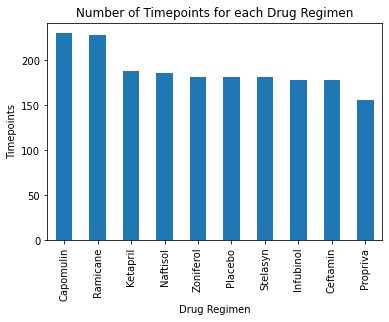

In [49]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
time_bar = clean_mouse_df["Drug Regimen"].value_counts().plot(kind="bar")

#Set axes and title
time_bar.set_xlabel("Drug Regimen")
time_bar.set_ylabel("Timepoints")
time_bar.set_title("Number of Timepoints for each Drug Regimen")

time_bar


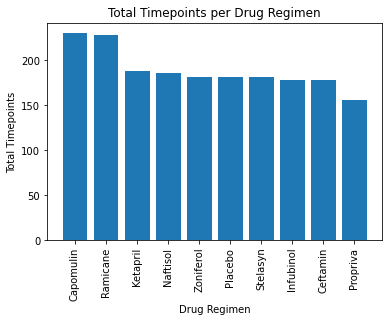

In [50]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
count_tp = clean_mouse_df["Drug Regimen"].value_counts()

#Generate x-axis
x_axis = np.arange(len(count_tp.index))
x_axis_ticks = [value for value in x_axis]

#Generate bar graph
plt.bar(x_axis, count_tp)
plt.xticks(x_axis_ticks, count_tp.index.values, rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Total Timepoints")
plt.title("Total Timepoints per Drug Regimen")

plt.show()





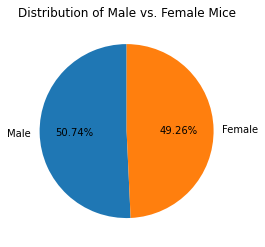

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = clean_mouse_df["Sex"].value_counts()

pie_chart = sex_counts.plot(kind="pie", title="Distribution of Male vs. Female Mice", autopct="%.2f%%", startangle=90)
pie_chart.set_ylabel("")

pie_chart



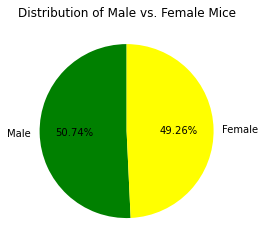

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_counts, labels=sex_counts.index.values,
        colors=["green", "yellow"], startangle=90, autopct="%.2f%%")
plt.title("Distribution of Male vs. Female Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [53]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
gtime_df = pd.DataFrame(clean_mouse_df.groupby("Mouse ID")["Timepoint"].max())
gtime_df = gtime_df.rename(columns={"Timepoint":"Max Timepoint"})
gtime_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mm_df = pd.merge(gtime_df, clean_mouse_df, on ="Mouse ID")
mm_df





,Mouse ID,Max Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,ID_Timepoint
0,a203,45,Infubinol,Female,20,23,0,45.000000,0,a2030
1,a203,45,Infubinol,Female,20,23,5,48.508468,0,a2035
2,a203,45,Infubinol,Female,20,23,10,51.852437,1,a20310
3,a203,45,Infubinol,Female,20,23,15,52.777870,1,a20315
4,a203,45,Infubinol,Female,20,23,20,55.173336,1,a20320
...,...,...,...,...,...,...,...,...,...,...
1883,z969,45,Naftisol,Male,9,30,25,63.145652,2,z96925
1884,z969,45,Naftisol,Male,9,30,30,65.841013,3,z96930
1885,z969,45,Naftisol,Male,9,30,35,69.176246,4,z96935
1886,z969,45,Naftisol,Male,9,30,40,70.314904,4,z96940


In [54]:
# Show values only for Capomulin, Ramicane, Infubinol, and Ceftamin

    
drop_df = mm_df.drop(mm_df[(mm_df["Drug Regimen"]!="Capomulin")&(mm_df["Drug Regimen"]!="Ramicane")
                           &(mm_df["Drug Regimen"]!="Infubinol")&(mm_df["Drug Regimen"]!="Ceftamin")].index)
drop_df

,Mouse ID,Max Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,ID_Timepoint
0,a203,45,Infubinol,Female,20,23,0,45.000000,0,a2030
1,a203,45,Infubinol,Female,20,23,5,48.508468,0,a2035
2,a203,45,Infubinol,Female,20,23,10,51.852437,1,a20310
3,a203,45,Infubinol,Female,20,23,15,52.777870,1,a20315
4,a203,45,Infubinol,Female,20,23,20,55.173336,1,a20320
...,...,...,...,...,...,...,...,...,...,...
1863,z581,45,Infubinol,Female,24,25,25,54.316407,2,z58125
1864,z581,45,Infubinol,Female,24,25,30,56.286750,2,z58130
1865,z581,45,Infubinol,Female,24,25,35,58.628399,3,z58135
1866,z581,45,Infubinol,Female,24,25,40,60.053740,3,z58140


In [55]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

for drug in drug_list:
    tumor_vol_df = drop_df.loc[drop_df["Drug Regimen"]==drug]
    tumor_vol_list.append(tumor_vol["Tumor Volume (mm3)"].max())
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes 
# add subset    
    quartiles = tumor_vol_df["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q-lower_q
    print(f"IQR for drug regimen {drug}: {iqr}")
     
  
    # Determine outliers using upper and lower bounds
    lower_bound = lower_q-1.5*iqr
    upper_bound = upper_q+1.5*iqr
    
    outliers = tumor_vol_df.loc[(tumor_vol_df["Tumor Volume (mm3)"]>=upper_bound)|
                           (tumor_vol_df["Tumor Volume (mm3)"]<=lower_bound),["Tumor Volume (mm3)"]].count()
    print(f"the drug regimen {drug} has {outliers} outliers")

IQR for drug regimen Capomulin: 7.314067135000002
the drug regimen Capomulin has Tumor Volume (mm3)    2
dtype: int64 outliers
IQR for drug regimen Ramicane: 8.325365415000007
the drug regimen Ramicane has Tumor Volume (mm3)    1
dtype: int64 outliers
IQR for drug regimen Infubinol: 10.002090667500006
the drug regimen Infubinol has Tumor Volume (mm3)    0
dtype: int64 outliers
IQR for drug regimen Ceftamin: 9.5930104575
the drug regimen Ceftamin has Tumor Volume (mm3)    0
dtype: int64 outliers


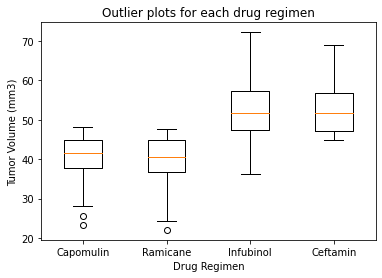

In [56]:
###### Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Generating plot
all_data = [drop_df.loc[drop_df["Drug Regimen"]=="Capomulin", "Tumor Volume (mm3)"],
            drop_df.loc[drop_df["Drug Regimen"]=="Ramicane", "Tumor Volume (mm3)"],
            drop_df.loc[drop_df["Drug Regimen"]=="Infubinol", "Tumor Volume (mm3)"],
            drop_df.loc[drop_df["Drug Regimen"]=="Ceftamin", "Tumor Volume (mm3)"]]
plt.boxplot(all_data)

#Modifying plot
plt.xticks(ticks=[1,2,3,4],labels=drug_list)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Outlier plots for each drug regimen")
plt.show()

## Line and Scatter Plots

,Mouse ID,Max Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,ID_Timepoint
174,b128,45,Capomulin,Female,9,22,0,45.000000,0,b1280
175,b128,45,Capomulin,Female,9,22,5,45.651331,0,b1285
176,b128,45,Capomulin,Female,9,22,10,43.270852,0,b12810
177,b128,45,Capomulin,Female,9,22,15,43.784893,0,b12815
178,b128,45,Capomulin,Female,9,22,20,42.731552,0,b12820
...,...,...,...,...,...,...,...,...,...,...
1826,y793,45,Capomulin,Male,17,17,25,38.992734,2,y79325
1827,y793,45,Capomulin,Male,17,17,30,35.726023,2,y79330
1828,y793,45,Capomulin,Male,17,17,35,36.327870,2,y79335
1829,y793,45,Capomulin,Male,17,17,40,31.475411,2,y79340


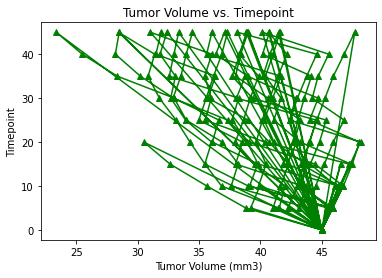

In [65]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Set up Dataframe for plot
capo_df = drop_df.loc[drop_df["Drug Regimen"]=="Capomulin"]

#Generate and show plot
plt.plot(capo_df["Tumor Volume (mm3)"], capo_df["Timepoint"], color="green", marker="^")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Timepoint")
plt.title("Tumor Volume vs. Timepoint")
plt.show()


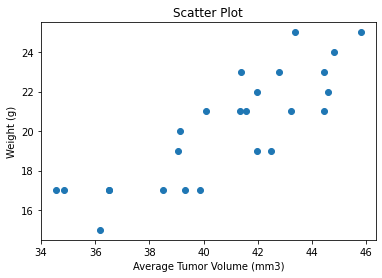

In [73]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#Create New DataFrame
avg_vol_df = pd.DataFrame(capo_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean())
avg_vol_df=avg_vol_df.rename(columns={"Tumor Volume (mm3)":"Average Tumor Volume (mm3)"})
#Merge to retrieve weight
merge1_df = pd.merge(avg_vol_df, capo_df, on="Mouse ID")

#Drop duplicates
scatter_df = merge1_df[["Weight (g)", "Average Tumor Volume (mm3)"]].drop_duplicates()

#Set up scatter plot
plt.scatter(scatter_df["Average Tumor Volume (mm3)"], scatter_df["Weight (g)"])
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.title("Scatter Plot")
plt.show()

## Correlation and Regression

The correlation between Avg Tumor volume and Weight is (0.8419363424694717, 1.322572243471279e-07)


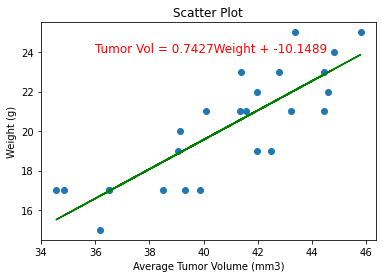

In [82]:
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen
corr = st.pearsonr(scatter_df["Average Tumor Volume (mm3)"], scatter_df["Weight (g)"])
print(f"The correlation between Avg Tumor volume and Weight is {corr}")

#Generate Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(scatter_df["Average Tumor Volume (mm3)"], scatter_df["Weight (g)"])
regress_values = scatter_df["Average Tumor Volume (mm3)"]*slope + intercept
line_eq = "Tumor Vol = " + str(round(slope,4)) + "Weight + " + str(round(intercept,4))

#Generate Plot
plt.scatter(scatter_df["Average Tumor Volume (mm3)"], scatter_df["Weight (g)"])
plt.plot(scatter_df["Average Tumor Volume (mm3)"],regress_values,"g-")
plt.annotate(line_eq,xy=(36,24),fontsize=12,color="red")
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.title("Scatter Plot")
plt.show()
